# Perkenalan

---

Nama    : Made Ary Widanthi

Batch   : RMT-20

Kelas   : FTDS

Link Visualisasi: https://lookerstudio.google.com/reporting/7da6302f-a248-4361-b5df-a9dfced3d219

---

# Identifikasi Masalah

Latar Belakang: <br>
Udemy adalah platform online open course masif yang menawarkan kursus gratis dan berbayar yang dimana Siapa saja dapat membuat kursus yang memungkinkan Udemy memiliki ratusan ribu kursus. Dataset ini berisi 3.682 catatan kursus dari 4 mata pelajaran (Business Finance, Graphic Design, Musical Instruments and Web Design) yang diambil dari Udemy.<br>

Topik Permasalahan: <br>
Udemy banyak memiliki course dengan berbagai subject. Dan saat ini Udemy ingin menyediakan course untuk subject yang peminatnya masih sedikit(Graphic Design). Maka dari itu akan di analisa korelasi antara jumlah subscriber dengan aspek lainnya seperti harga, durasi course, jumlah course dll.

Problem Statement: <br>
Mengetahui Preferensi Udemy User Dengan Tujuan Memudahkan Platform Udemy Untuk Memfilter Kriteria Course Yang Paling Diminati Pengguna Udemy.

Penjabaran 5W + 1H:
1. Subject berbayar apa yang paling diminati oleh Udemy users?
2. Tipe Course yang seperti apa yang diminati oleh Udemy users?
3. Apakah ada korelasi antara jumlah subscriber dengan data numerikal lainnya?
4. Bagaimana perbandingan jumlah peminat course pertahunnya?
5. Apakah ada perbedaan jumlah subscriber dari tahun ke tahun?
6. Subject apa yang perlu memiliki peminat paling rendah? dan apa upaya untuk meningkatkan jumlah subscriber?






# Import Library

In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

# Data Loading

source: Kaggle https://www.kaggle.com/datasets/andrewmvd/udemy-courses <br>

Features: <br>
course_id - id field for courses <br>
course_title - title field for courses<br>
url - url field to course page<br>
is_paid - boolean field - True for Paid / False for Free<br>
price - price field for course fee<br>
num_subscribers - demand field for each courses<br>
num_reviews - review number for each courses<br>
num_lectures - lecture per course<br>
level - course level by trainee experience<br>
content_duration - course duration in hours<br>
published_timestamp - timestamp field for publication<br>
subject - course type field<br>

In [2]:
#read data
df = pd.read_csv('udemy_courses.csv')
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [3]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [4]:
df['num_lectures'].unique()

array([ 51, 274,  36,  26,  25,  23,  38,  15,  76,  17,  19,  16,  42,
        52,  12,  39,  40,  50,  81,  37,  41,  35,  80,  22,  28,  68,
        61, 138, 110, 174, 103,  79, 227,  43,  46,  62,  53,  77,  20,
        47,  33,  11, 102,  45,  32,  30,  18,  60,  54,  24, 134,   5,
        10,  49,  14,   6, 108,  57,   9,  13,   8, 462,  29,  59, 284,
        55,  34,  31, 544,  66,  21,  88,  44,  27,  48,  90,   7,  97,
       128,  63, 235, 211, 100,  82, 123, 332, 272,  69, 129, 316,  70,
       105, 176,  91,  64,  72,   4,  58, 142, 395, 194, 527,  74,  84,
        87,  65, 460, 101,  95, 107, 113,  71, 145,  75, 444,   0, 127,
        98, 286, 120, 130,  73, 121,  56, 158, 241,  86, 187, 111,  85,
       150,  96,  94, 119,  78, 122, 124, 163, 131,  67, 141, 118, 166,
       154, 185, 207, 225, 202, 115, 156,  83,  99, 196, 162,  89, 362,
       136, 310, 104, 291, 144, 161, 224, 240, 183, 192, 309, 215, 106,
       321, 151,  92, 126, 112,  93, 125, 348, 402, 135, 171, 21

In [5]:
# cek data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [6]:
#cek unique value
df.nunique()

course_id              3672
course_title           3663
url                    3672
is_paid                   2
price                    38
num_subscribers        2197
num_reviews             511
num_lectures            229
level                     4
content_duration        105
published_timestamp    3672
subject                   4
dtype: int64

In [7]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

Tidak ditemukannya missing value

# Data Cleaning

In [8]:
#menghapus kolom url karena tidak dibutuhkan saat melakukan pengolahan data
df = df.drop('url', axis=1)

In [9]:
df = df.drop('course_title', axis=1)

In [10]:
# Mengubah object menjadi datetime
df['published_timestamp']=pd.to_datetime(df['published_timestamp'])

In [11]:
# membuat kolom baru 'year'
df['year']=df['published_timestamp'].dt.year

In [12]:
# Mengubah content duration menjadi menit
df['content_duration']=(df['content_duration']*60).astype(int)
df

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
0,1070968,True,200,2147,23,51,All Levels,90,2017-01-18 20:58:58+00:00,Business Finance,2017
1,1113822,True,75,2792,923,274,All Levels,2340,2017-03-09 16:34:20+00:00,Business Finance,2017
2,1006314,True,45,2174,74,51,Intermediate Level,150,2016-12-19 19:26:30+00:00,Business Finance,2016
3,1210588,True,95,2451,11,36,All Levels,180,2017-05-30 20:07:24+00:00,Business Finance,2017
4,1011058,True,200,1276,45,26,Intermediate Level,120,2016-12-13 14:57:18+00:00,Business Finance,2016
...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,True,100,1040,14,21,All Levels,120,2016-06-14 17:36:46+00:00,Web Development,2016
3674,1088178,True,25,306,3,42,Beginner Level,210,2017-03-10 22:24:30+00:00,Web Development,2017
3675,635248,True,40,513,169,48,All Levels,210,2015-12-30 16:41:42+00:00,Web Development,2015
3676,905096,True,50,300,31,38,All Levels,180,2016-08-11 19:06:15+00:00,Web Development,2016


# Analisis dan Perhitungan

In [13]:
#buat list data bertipe object dan number
obj_cols= list(df.select_dtypes('object'))
num_cols= list(df.select_dtypes('number'))
print(obj_cols)
print(num_cols)

['level', 'subject']
['course_id', 'price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'year']


## Statistika Deskriptif 

In [14]:
## Filtering paid content only
paid_course = df[df['is_paid']==True]
paid_course.head(10)

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
0,1070968,True,200,2147,23,51,All Levels,90,2017-01-18 20:58:58+00:00,Business Finance,2017
1,1113822,True,75,2792,923,274,All Levels,2340,2017-03-09 16:34:20+00:00,Business Finance,2017
2,1006314,True,45,2174,74,51,Intermediate Level,150,2016-12-19 19:26:30+00:00,Business Finance,2016
3,1210588,True,95,2451,11,36,All Levels,180,2017-05-30 20:07:24+00:00,Business Finance,2017
4,1011058,True,200,1276,45,26,Intermediate Level,120,2016-12-13 14:57:18+00:00,Business Finance,2016
5,192870,True,150,9221,138,25,All Levels,180,2014-05-02 15:13:30+00:00,Business Finance,2014
6,739964,True,65,1540,178,26,Beginner Level,60,2016-02-21 18:23:12+00:00,Business Finance,2016
7,403100,True,95,2917,148,23,All Levels,150,2015-01-30 22:13:03+00:00,Business Finance,2015
8,476268,True,195,5172,34,38,Expert Level,150,2015-05-28 00:14:03+00:00,Business Finance,2015
9,1167710,True,200,827,14,15,All Levels,60,2017-04-18 18:13:32+00:00,Business Finance,2017


### Central Tendency 
Menganalisa persebaran data pada numerikal data untuk menentukan metode yang akan digunakan saat melakukan pengujian statistik

In [15]:
paid_course.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration,year
count,3.368000e+03,3368.000000,3368.000000,3368.000000,3368.000000,3368.000000,3368.000000
mean,6.745476e+05,72.128860,2429.808492,131.437945,41.829276,256.069181,2015.424881
std,3.403628e+05,60.214043,6360.316147,926.066894,52.021725,374.984788,1.178588
min,8.324000e+03,20.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,4.128620e+05,25.000000,89.000000,4.000000,15.000000,90.000000,2015.000000
50%,6.816030e+05,50.000000,734.500000,15.000000,26.000000,150.000000,2016.000000
75%,9.570065e+05,100.000000,2054.750000,53.000000,48.000000,270.000000,2016.000000
max,1.282064e+06,200.000000,121584.000000,27445.000000,779.000000,4710.000000,2017.000000


positive skew= mode < median < mean
negative skew= mean < median < mode

Berdasarkan informasi diatas yang merupakan positive skew adalah: num_subscribers, num_lectures, content_duration, num_reviews


#### Cek Data distribution menggunakan grafik

<Axes: xlabel='price', ylabel='Count'>

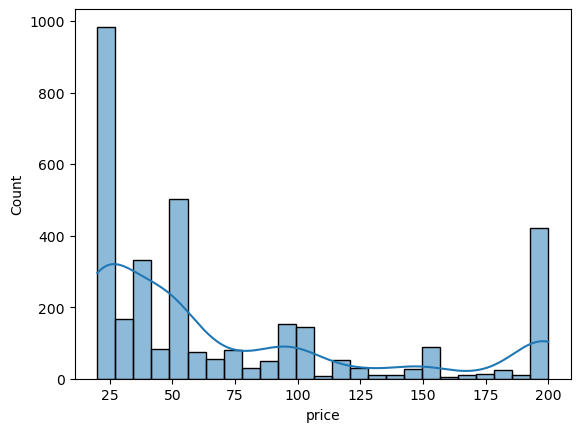

In [16]:
sns.histplot(paid_course['price'], bins=25, kde=True)

In [17]:
paid_course['price'].skew()

1.1340100519404568

Data diatas tidak terdistribusi dengan normal

<Axes: xlabel='num_subscribers', ylabel='Count'>

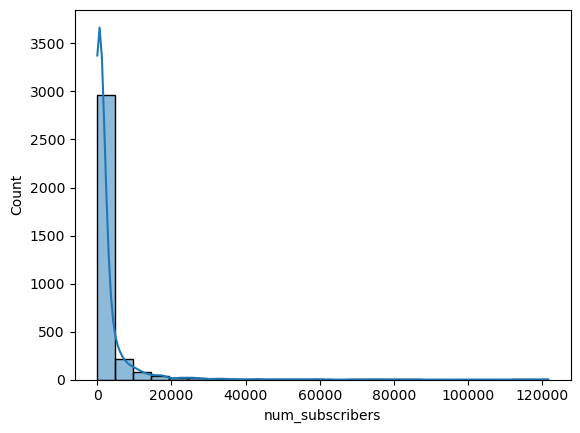

In [18]:
sns.histplot(paid_course['num_subscribers'], bins=25, kde=True)

In [19]:
paid_course['num_subscribers'].skew()

8.430874239824515

Data diatas terdistribusi dengan normal atau bisa disebut positive skew

<Axes: xlabel='num_reviews', ylabel='Count'>

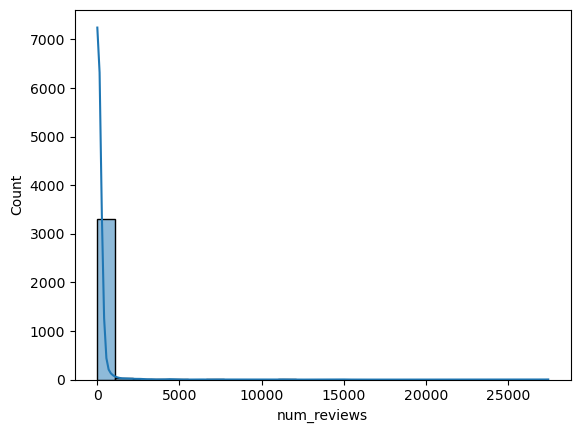

In [20]:
sns.histplot(paid_course['num_reviews'], bins=25, kde=True)

Data diatas terdistribusi dengan normal atau bisa disebut positive skew

<Axes: xlabel='num_lectures', ylabel='Count'>

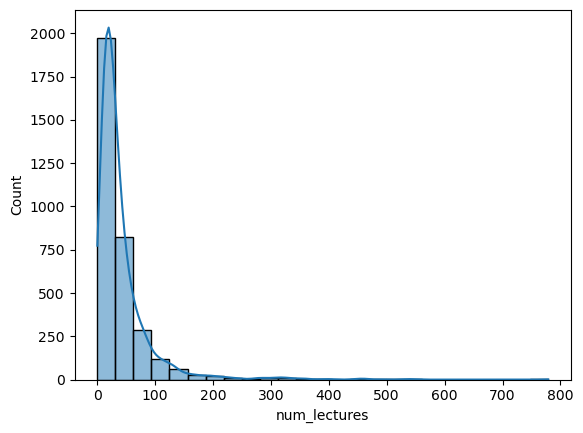

In [21]:
sns.histplot(paid_course['num_lectures'], bins=25, kde=True)

Data diatas terdistribusi dengan normal atau bisa disebut positive skew

<Axes: xlabel='content_duration', ylabel='Count'>

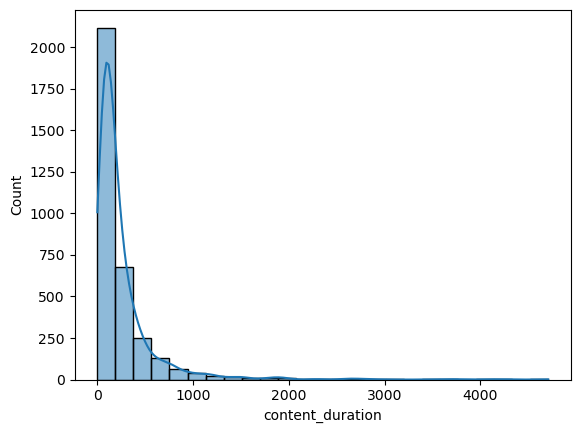

In [22]:
sns.histplot(paid_course['content_duration'], bins=25, kde=True)

In [23]:
paid_course['content_duration'].skew()

5.291340856018148

Data diatas tidak terdistribusi dengan normal atau bisa disebut positive skew

Kesimpulan: <br>
Berdasarkan grafik diatas, semua numerikal data bukan merupakan distribusi normal, maka dari itu untuk tahap selanjutnya digunakan statistika inferensial non parametric untuk menganalisa data lebih lanjut.

## Statistik Inferensial
Proses analisa udemy course numerikal data menggunakan non parametric test karena pendistribusian data nya tidak normal.  

### Spearman Test
Metode ini diperlukan untuk mengukur keeratan hubungan antara dua variabel.

#### Menganalisa korelasi antara content durasi dan jumlah subscriber

Melakukan Uji Hipotesis menggunakan spearman test karena data tidak terdistribusi normal <br>
H0 = content_duration tidak berpengaruh pada jumlah subscribers <br>
H1 = content_duration berpengaruh pada jumlah subscribers

In [43]:
#sample data
x = paid_course['content_duration']
y = paid_course['num_subscribers']
 
# calculate Spearman's correlation coefficient and p-value
corr, pval = spearmanr(x, y)
 
# print the result
print("Koefisien korelasi Spearman:", corr)
print("p-value:", pval)

if pval <= 0.05:
    print("Tolak hipotesis nol.")
    print("Ada bukti korelasi yang signifikan antara variabel.")
else:
    print("Gagal menolak hipotesis nol.")
    print("Tidak cukup bukti untuk menyimpulkan korelasi yang signifikan.")

Koefisien korelasi Spearman: 0.23453765654484265
p-value: 2.579671086126573e-43
Tolak hipotesis nol.
Ada bukti korelasi yang signifikan antara variabel.


Kesimpulan:<br>
Content durasi dan jumlah subscriber memiliki tingkat korelasi sebesar 23%. Di sini, 0,23 menunjukkan hubungan yang relatif lemah, tetapi positif, menunjukkan bahwa ketika satu variabel meningkat, demikian pula yang lain, meskipun pengaruhnya tidak terlalu kuat, tetapi p-value <= 0,05 yang dimana terbuktinya korelasi antara Content durasi ddengan jumlah subscriber

#### Menganalisa Korelasi harga terhadap jumlah subscriber

Melakukan Uji Hipotesis menggunakan spearman test karena data tidak terdistribusi normal <br>
H0 = harga course tidak berpengaruh pada jumlah subscribers <br>
H1 = harga course berpengaruh pada jumlah subscribers

In [44]:
#sample data
x = paid_course['price']
y = paid_course['num_subscribers']
 
# calculate Spearman's correlation coefficient and p-value
corr, pval = spearmanr(x, y)
 
# print the result
print("Koefisien korelasi Spearman:", corr)
print("p-value:", pval)

if pval <= 0.05:
    print("Tolak hipotesis nol.")
    print("Ada bukti korelasi yang signifikan antara variabel.")
else:
    print("Gagal menolak hipotesis nol.")
    print("Tidak cukup bukti untuk menyimpulkan korelasi yang signifikan.")

Koefisien korelasi Spearman: 0.26695483921842167
p-value: 4.701738860681964e-56
Tolak hipotesis nol.
Ada bukti korelasi yang signifikan antara variabel.


Harga course dan jumlah subscriber memiliki tingkat korelasi sebesar 26%. Di sini, 0,26 juga menunjukkan hubungan yang relatif lemah, tetapi positif, menunjukkan bahwa ketika satu variabel meningkat, demikian pula yang lain, meskipun pengaruhnya tidak terlalu kuat. 

#### Menganalisa pengaruh jumlah reviews dan jumlah subscribers

Melakukan Uji Hipotesis menggunakan spearman test karena data tidak terdistribusi normal <br>
H0 = jumlah review tidak berpengaruh pada jumlah subscribers <br>
H1 = jumlah review berpengaruh pada jumlah subscribers

In [45]:
#sample data
x = paid_course['num_reviews']
y = paid_course['num_subscribers']
 
# calculate Spearman's correlation coefficient and p-value
corr, pval = spearmanr(x, y)
 
# print the result
print("Koefisien korelasi Spearman:", corr)
print("p-value:", pval)

if pval <= 0.05:
    print("Tolak hipotesis nol.")
    print("Ada bukti korelasi yang signifikan antara variabel.")
else:
    print("Gagal menolak hipotesis nol.")
    print("Tidak cukup bukti untuk menyimpulkan korelasi yang signifikan.")

Koefisien korelasi Spearman: 0.7637675913716434
p-value: 0.0
Tolak hipotesis nol.
Ada bukti korelasi yang signifikan antara variabel.


Harga course dan jumlah subscriber memiliki tingkat korelasi sebesar 76%. yang dimana 76% menunjukkan hubungan yang relatif kuat. ini menunjukkan bahwa ketika satu variabel meningkat, demikian pula yang lain. 

#### Menganalisa pengaruh jumlah lectures dan jumlah subscribers

Melakukan Uji Hipotesis menggunakan spearman test karena data tidak terdistribusi normal <br>
H0 = jumlah lectures tidak berpengaruh pada jumlah subscribers <br>
H1 = jumlah lectures berpengaruh pada jumlah subscribers

In [46]:
x = paid_course['num_lectures']
y = paid_course['num_subscribers']
 
corr, pval = spearmanr(x, y)
 
# print the result
print("Koefisien korelasi Spearman:", corr)
print("p-value:", pval)

if pval <= 0.05:
    print("Tolak hipotesis nol.")
    print("Ada bukti korelasi yang signifikan antara variabel.")
else:
    print("Gagal menolak hipotesis nol.")
    print("Tidak cukup bukti untuk menyimpulkan korelasi yang signifikan.")

Koefisien korelasi Spearman: 0.2895563963859366
p-value: 4.684282403724947e-66
Tolak hipotesis nol.
Ada bukti korelasi yang signifikan antara variabel.


Harga course dan jumlah subscriber memiliki tingkat korelasi sebesar 28%. Di sini, 0,28 juga menunjukkan hubungan yang relatif lemah, tetapi positif, menunjukkan bahwa ketika satu variabel meningkat, demikian pula yang lain, meskipun pengaruhnya tidak terlalu kuat. 

## Penjabaran

In [28]:
subject_by_year = paid_course.groupby(['year', 'subject']).size()
subject_by_year

year  subject            
2011  Web Development          5
2012  Business Finance         6
      Graphic Design           8
      Musical Instruments      9
      Web Development         18
2013  Business Finance        77
      Graphic Design          23
      Musical Instruments     36
      Web Development         49
2014  Business Finance       170
      Graphic Design          65
      Musical Instruments    116
      Web Development         88
2015  Business Finance       326
      Graphic Design         159
      Musical Instruments    159
      Web Development        308
2016  Business Finance       315
      Graphic Design         169
      Musical Instruments    215
      Web Development        410
2017  Business Finance       205
      Graphic Design         144
      Musical Instruments     99
      Web Development        189
dtype: int64

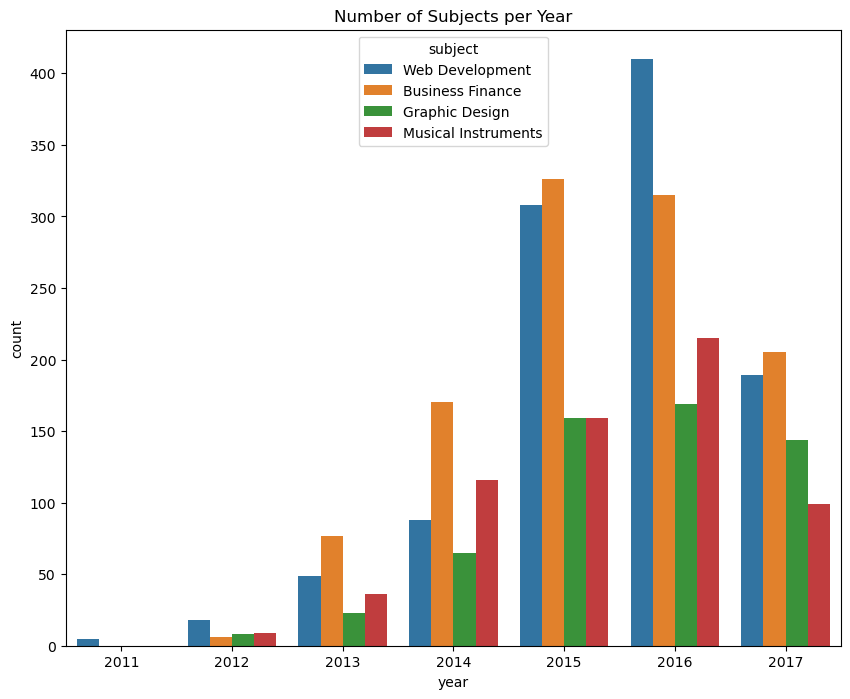

In [29]:
subject_by_year = subject_by_year.reset_index(name='count')
plt.figure(figsize=(10, 8))
sns.barplot(x='year', y='count', hue='subject', data=subject_by_year)
plt.title('Number of Subjects per Year')
plt.show()

Subject yang memiliki peminat paling rendah adalah Graphic Design. Keseluruhan data mengalami peningkatan dari 2011 - 2016 dan mengalami penurunan pada tahun 2017

<Axes: ylabel='is_paid'>

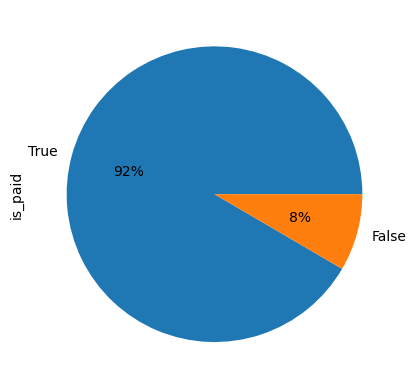

In [30]:
df['is_paid'].value_counts().plot(kind='pie',autopct='%.0f%%')

<Axes: ylabel='subject'>

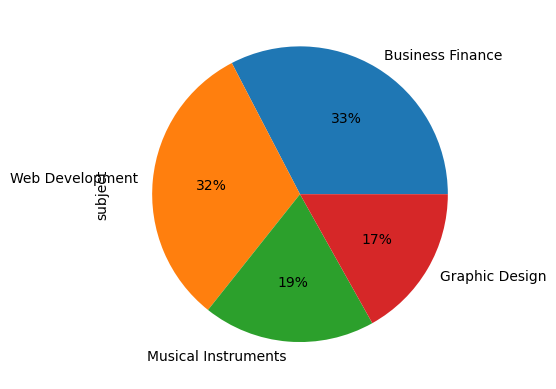

In [31]:
paid_course['subject'].value_counts().plot(kind='pie',autopct='%.0f%%')

Web Development dan Business Finance memiliki persentase subsriber paling tinggi dengan angka 32% dan 33% dibandingkan subject lainnya

<Axes: ylabel='level'>

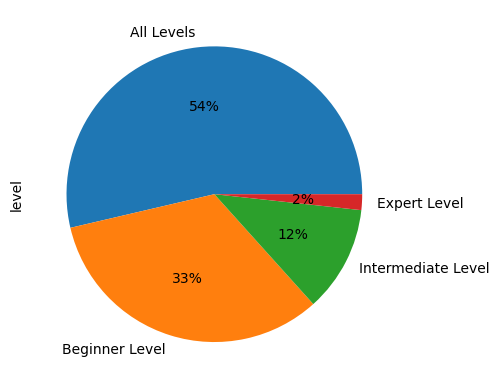

In [32]:
paid_course['level'].value_counts().plot(kind='pie',autopct='%.0f%%')

Udemy menyediakan all levels course sebanyak 54% dan beginnir level sebanyak 33% 

#### Kesimpulan
Dari keseluruhan data, terdapat 92% course berbayar yang dimana subject Business Finance dan Business Development menjadi subject yang paling diminati oleh Udemy user. Level course yang disediakan Udemy sebanyak 52% merupakan all levels. Analisa selanjutnya akan berfokus pada paid course untuk mengetahui tipe course yang disukai Udemy users.

In [33]:
# Subject Paling di Minati setiap tahunnya
grouped_data = paid_course.groupby(['year', 'subject'])['num_subscribers']
new_table = pd.DataFrame(grouped_data.count())
new_table

num_subscribers
year subject                             
2011 Web Development                    5
2012 Business Finance                   6
     Graphic Design                     8
     Musical Instruments                9
     Web Development                   18
2013 Business Finance                  77
     Graphic Design                    23
     Musical Instruments               36
     Web Development                   49
2014 Business Finance                 170
     Graphic Design                    65
     Musical Instruments              116
     Web Development                   88
2015 Business Finance                 326
     Graphic Design                   159
     Musical Instruments              159
     Web Development                  308
2016 Business Finance                 315
     Graphic Design                   169
     Musical Instruments              215
     Web Development                  410
2017 Business Finance                 205
     Graphic Design                   144
     Musical Instruments               99
     Web Development                  189

2011 = Web Development<br>
2012 = Web Development<br>
2013 = Business Finance<br>
2014 = Business Finance<br>
2015 = Business Finance<br>
2016 = Web Development<br>
2017 = Business Finance<br>

Top Subject adalah Web Development & Business Finance

In [34]:
#bisa jg dilihat di dataframe ini
test1= paid_course.groupby(["subject"]).count()
test1

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,year
subject,,,,,,,,,,
Business Finance,1099,1099,1099,1099,1099,1099,1099,1099,1099,1099
Graphic Design,568,568,568,568,568,568,568,568,568,568
Musical Instruments,634,634,634,634,634,634,634,634,634,634
Web Development,1067,1067,1067,1067,1067,1067,1067,1067,1067,1067


Menganalisa tipe course yang paling banyak peminatnya berdasarkan subject Web Development dan Business Finance (karena course yang diminati)

In [35]:
# Analisa berdasarkan level untuk web development 
test = paid_course[(paid_course['subject'].isin(['Web Development', 'Business Finance','Graphic Design']))].groupby(['subject', 'level'])['num_subscribers'].count()
test

subject           level             
Business Finance  All Levels            646
                  Beginner Level        300
                  Expert Level           31
                  Intermediate Level    122
Graphic Design    All Levels            283
                  Beginner Level        225
                  Expert Level            5
                  Intermediate Level     55
Web Development   All Levels            611
                  Beginner Level        323
                  Expert Level           15
                  Intermediate Level    118
Name: num_subscribers, dtype: int64

Berdasarkan tipe level, Udemy users banyak memilih course dengan materi untuk all levels dan beginner level

In [36]:
# Mencari rata-rata content durasi
mean_duration1 = paid_course[paid_course['subject'] == 'Web Development']['content_duration'].mean()
mean_duration2 = paid_course[paid_course['subject'] == 'Business Finance']['content_duration'].mean()
mean_duration3 = paid_course[paid_course['subject'] == 'Graphic Design']['content_duration'].mean()

print("Rata - rata durasi waktu course Web Development =", mean_duration1/60)
print("Rata - rata durasi waktu course Business Finance =", mean_duration2/60)
print("Rata - rata durasi waktu course Graphic Design =", mean_duration3/60)

Rata - rata durasi waktu course Web Development = 5.972742892845986
Rata - rata durasi waktu course Business Finance = 3.6755686988171066
Rata - rata durasi waktu course Graphic Design = 3.682922535211268


Durasi course yang paling banyak diminati adalah range 3 - 6 jam

In [37]:
# Mencari rata-rata harga course
mean_duration1 = paid_course[paid_course['subject'] == 'Web Development']['price'].mean()
mean_duration2 = paid_course[paid_course['subject'] == 'Business Finance']['price'].mean()
mean_duration3 = paid_course[paid_course['subject'] == 'Graphic Design']['price'].mean()

print("Rata - rata harga course Web Development =", mean_duration1)
print("Rata - rata harga course Business Finance =", mean_duration2)
print("Rata - rata harga course Graphic Design =", mean_duration3)

Rata - rata harga course Web Development = 86.63542642924087
Rata - rata harga course Business Finance = 74.54049135577797
Rata - rata harga course Graphic Design = 61.390845070422536


Harga yang masih terjangkau untuk Udemy users adalah range "$61" - "$87"

In [38]:
# Mencari rata-rata jumlah lectures
mean_duration1 = paid_course[paid_course['subject'] == 'Web Development']['num_lectures'].median()
mean_duration2 = paid_course[paid_course['subject'] == 'Business Finance']['num_lectures'].median()
mean_duration3 = paid_course[paid_course['subject'] == 'Graphic Design']['num_lectures'].median()

print("Median jumlah lectures course Web Development =", mean_duration1)
print("Median jumlah lectures Business Finance =", mean_duration2)
print("Median jumlah lectures Graphic Design =", mean_duration3)

Median jumlah lectures course Web Development = 36.0
Median jumlah lectures Business Finance = 22.0
Median jumlah lectures Graphic Design = 22.0


Range jumlah lecture adalah 22 - 36 lecture, yang artinya users menikmati course jika lebih dari 2 lecture yang memaparkan materi

# Kesimpulan

Berdasarkan data pertahunnya, Course berbayar dengan subject yang paling sedikit peminatnya adalah Graphic Design. Analisa ini dilakukan dengan membandingkan jumlah subscriber dari subject lainnya. Hal ini dilakukan karena Udemy ingin menambahkan course dengan subject Graphic Design dengan harapan jumlah subscribernya akan meningkat. Kriteria course di analisa dengan mengetahui user behaviour dari course dengan peminat terbanyak yaitu web development dan business finance. <br>

Sebelum mengolah data, di cek terlebih dahulu apakah ada korelasi antara metric satu dengan yang lainnya menggunakan metode Spearman Test. Dapat di simpulkan bahwa adanya korelasi antara jumlah subscriber dengan harga course, durasi content, jumlah reviews dan jumlah lecture yang mengajar course. 

Point penting: <br>
- all levels dan beginner level course paling banyak diminati 
- durasi course yang ideal (banyak peminatnya) adalah range 3 - 6 jam
- dengan harga yg tergolong terjangkau untuk Udemy users adalah range "$61" - "$87"
- dan jumlah lecture yang ideal range 22 - 36 <br> 

Dengan mengetahui kriteria course akan memudahkan Udemy untuk memfilter course jika ingin menambahkan course baru dan tentunya dapat memaksimalkan jumlah subscriber pada subject Graphic Design menggunakan strategi marketing yang dimana mentargetkan audience yang memiliki interest di graphic design dan melakukan remarketing bagi user yang sudah menyelesaikan all level/beginner level untuk melanjutkan coursenya di level intermediete dan advance.

In [39]:
paid_course.to_csv('Paid Course.csv', index=False)